# **ANALYSE DES VENTES D'UN MAGASIN DE PRODUITS ELECTRONIQUES**

J'ai essayé d'analyser les données de cette entreprise pour l'année 2019 en répondant aux questions suivantes :

1- Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ? \
2- Dans quelle ville a-t-on le plus vendu de produits ? \
3- A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ? \
4- Quels sont les produits qui sont souvent achetés ensemble ? \
5- Quel produit a-t-on le plus vendu? 

Je vais accompagner mes solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.

#  La List

In [1]:
import pandas
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
          .master("local[10]") \
          .appName("Big-Data-Analyse-Des-Ventes") \
          .getOrCreate()

In [2]:
df_from_file = spark.read \
.option("header","True") \
.option("sep",",") \
.option("inferSchema", "True") \
.csv("C:\\Users\\furkan\\spark\\Datasets\\dataset.csv")

df_from_file.limit(10000).toPandas().head(100)

,Order ID,Product,Quantity Ordered,Price Each,Purchase_Address,Month,Sales,City,Hour,Time
0,147268,Wired Headphones,1,11.99,9 Lake St New York City NY 10001,January,11.99,New York City,3,03:07:00
1,148041,USB-C Charging Cable,1,11.95,760 Church St San Francisco CA 94016,January,11.95,San Francisco,3,03:40:00
2,149343,Apple Airpods Headphones,1,150.00,735 5th St New York City NY 10001,January,150.00,New York City,4,04:56:00
3,149964,AAA Batteries (4-pack),1,2.99,75 Jackson St Dallas TX 75001,January,2.99,Dallas,5,05:53:00
4,149350,USB-C Charging Cable,2,11.95,943 2nd St Atlanta GA 30301,January,23.90,Atlanta,6,06:03:00
...,...,...,...,...,...,...,...,...,...,...
95,147451,Wired Headphones,1,11.99,229 Elm St New York City NY 10001,January,11.99,New York City,12,12:57:00
96,147932,Macbook Pro Laptop,1,1700.00,477 Main St Boston MA 02215,January,1700.00,Boston,12,12:59:00
97,142178,AAA Batteries (4-pack),1,2.99,877 10th St Seattle WA 98101,January,2.99,Seattle,12,12:59:00
98,145319,Apple Airpods Headphones,1,150.00,905 River St San Francisco CA 94016,January,150.00,San Francisco,13,13:05:00


# Le schéma

In [3]:
df_from_file.printSchema()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Purchase_Address: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Time: string (nullable = true)



# 1- Le meilleur mois de vente et son chiffre d’affaires

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_from_file.createOrReplaceTempView("dataset")

In [6]:
df_from_file.createOrReplaceTempView("dataset_produit")

In [7]:
Meilleur_Produit = spark.sql("""
        SELECT  Product as Produit , SUM(Sales) as Ventes
        From dataset_produit    
        GROUP BY Produit
""")

In [8]:
pandas_df1 = Meilleur_Produit.toPandas()

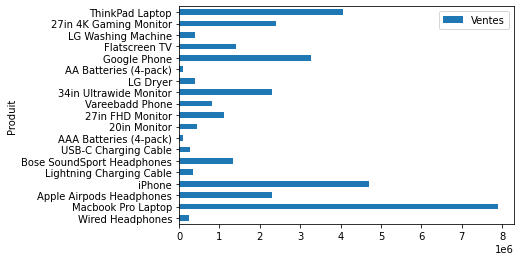

In [9]:
pandas_df1.plot(x='Produit', y='Ventes' , kind='barh')
plt.show()

In [10]:
Meilleur_Mois = spark.sql("""
        SELECT  Month as Mois, SUM(Sales) as Ventes 
        From dataset
        GROUP BY Mois
        ORDER BY Ventes DESC    
""")

In [11]:
pandas_df = Meilleur_Mois.toPandas()

<AxesSubplot:xlabel='Mois'>

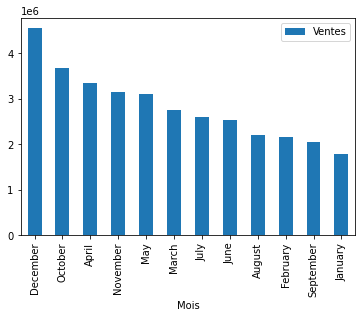

In [12]:
pandas_df.plot(x='Mois', y='Ventes' , kind='bar')

# plt.xlabel('Sales')
# plt.ylabel('Month')

# Afficher le graphique




# **2- Dans quelle ville a-t-on le plus vendu de produits ?**

In [13]:
import seaborn as sns

In [14]:
df_from_file.createOrReplaceTempView("dataset_city")

In [15]:
Meilleur_Produit = spark.sql("""
        SELECT  City as City, SUM(Sales) as Ventes
        FROM dataset_city
        GROUP BY City
""").toPandas()

<Figure size 72x72 with 0 Axes>

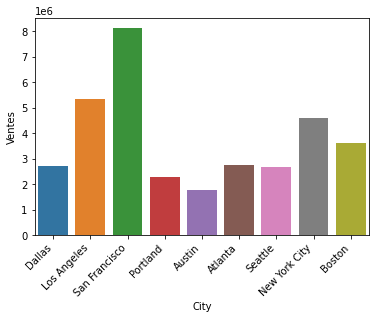

<Figure size 72x72 with 0 Axes>

In [16]:
ax = sns.barplot(data=Meilleur_Produit, x='City', y='Ventes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.figure(figsize=(1,1))


# **3- A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?**


In [17]:
import seaborn as sns

In [18]:
Meilleur_heure = spark.sql("""

    SELECT Hour as Heure, count(Sales) as Nombre  From dataset
    GROUP BY Hour
    ORDER BY Nombre DESC
    
""").toPandas().head(120)

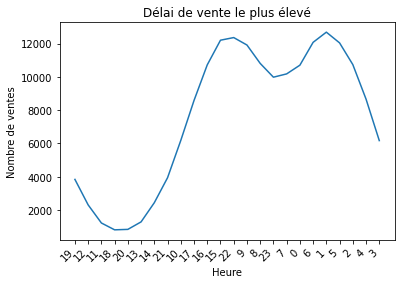

<Figure size 576x432 with 0 Axes>

In [19]:
ax = sns.lineplot(data=Meilleur_heure, x='Heure', y='Nombre')

x_ticks = range(len(Meilleur_heure['Heure']))
x_labels =Meilleur_heure['Heure']

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha='right')


plt.title('Délai de vente le plus élevé')
plt.xlabel('Heure')
plt.ylabel('Nombre de ventes')

plt.figure(figsize=(8,6))

plt.show()


# 4- Quels sont les produits qui sont souvent achetés ensemble ?

In [20]:
from pyspark.sql.functions import col

In [21]:
spark.sql("""

    SELECT *  
    FROM dataset
""").toPandas().head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase_Address,Month,Sales,City,Hour,Time
0,147268,Wired Headphones,1,11.99,9 Lake St New York City NY 10001,January,11.99,New York City,3,03:07:00
1,148041,USB-C Charging Cable,1,11.95,760 Church St San Francisco CA 94016,January,11.95,San Francisco,3,03:40:00


In [22]:
# Recherche de lignes en double par "ID de commande"
df4 = spark.sql("""

    SELECT *  
    FROM dataset
    WHERE `Order ID` IN (
        Select `Order ID`
        FROM dataset
        GROUP BY `Order ID`
        HAVING COUNT(*) > 1
    )    
""")

In [23]:
# Regroupement par "Order ID" et création d'une colonne "Grouped"
df5= spark.sql("""

    SELECT `Order ID` as Order_ID, Product, `Quantity Ordered`, `Price Each`, Purchase_Address, Month, Sales, City, Hour, Time ,
        CONCAT_WS(',', COLLECT_SET(Product) OVER (PARTITION BY `Order ID`)) AS Grouped
    FROM dataset
""")

In [24]:
df5.createOrReplaceTempView("dataset_df5")

In [25]:
# Prendre unique order_id / Supprimer les order_id dupliqués
df6 = spark.sql("""
    SELECT DISTINCT Order_ID , Grouped
    FROM dataset_df5
""")

In [26]:
pandas_df = df6.toPandas().head(5)

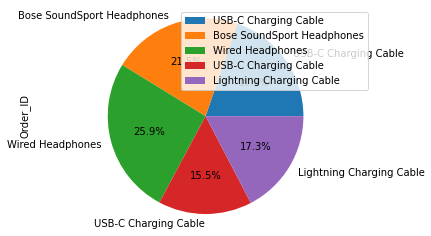

In [28]:
pandas_df.plot(kind='pie', y='Order_ID', labels=pandas_df['Grouped'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# **5- Produit le plus vendu**

In [30]:
Plus_Vendu_DF = spark.sql("""
        SELECT  Product as Produit , SUM( `Quantity Ordered`) as Nombre
        From dataset_produit    
        GROUP BY Produit
""")

In [31]:
pandas_df = Plus_Vendu_DF.toPandas()

<AxesSubplot:xlabel='Produit'>

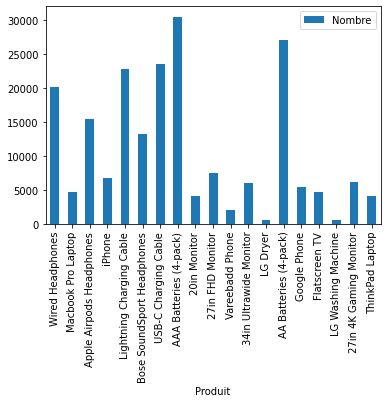

In [32]:
pandas_df.plot(x='Produit', y='Nombre' , kind='bar')